# Linear models to predict Bitcoin price

a simple prediction model to compare LinearRegression model, Lasso and Ridge by their time, accuracy and errors

In [2]:
import yfinance as yf
btc = yf.download("BTC-USD", start='2020-01-01')

[*********************100%%**********************]  1 of 1 completed


## preview of btc dataet

In [3]:
btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


### get gold price and preview the data

In [4]:
gold = yf.download('Gold', start='2020-01-01')


[*********************100%%**********************]  1 of 1 completed


In [5]:
gold.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,18.709999,18.809999,18.370001,18.490000,16.333748,7096800
2020-01-03,18.930000,18.959999,18.430000,18.570000,16.404417,13759300
2020-01-06,18.980000,19.010000,18.370001,18.389999,16.245407,14286900
2020-01-07,18.389999,18.530001,18.129999,18.469999,16.316074,12084100
2020-01-08,18.510000,18.510000,17.709999,17.820000,15.741879,14582200


### get ETH price and preview the data

In [6]:
eth = yf.download("ETH-USD", start="2020-01-01")

[*********************100%%**********************]  1 of 1 completed


In [7]:
eth.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,129.630661,132.835358,129.198288,130.802002,130.802002,7935230330
2020-01-02,130.820038,130.820038,126.954910,127.410179,127.410179,8032709256
2020-01-03,127.411263,134.554016,126.490021,134.171707,134.171707,10476845358
2020-01-04,134.168518,136.052719,133.040558,135.069366,135.069366,7430904515
2020-01-05,135.072098,139.410202,135.045624,136.276779,136.276779,7526675353


### add gold price and volume and ETH price and volume to btc dataset

In [8]:
btc['Gold'] = gold.Close
btc['Gold-Volume'] = gold.Volume

btc['ETH'] = eth.Close
btc['ETH-Volume'] = eth.Volume


In [9]:
btc.head()

,Open,High,Low,Close,Adj Close,Volume,Gold,Gold-Volume,ETH,ETH-Volume
Date,,,,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,NaN,NaN,130.802002,7935230330
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,18.49,7096800.0,127.410179,8032709256
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,18.57,13759300.0,134.171707,10476845358
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,NaN,NaN,135.069366,7430904515
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,NaN,NaN,136.276779,7526675353


### set a new column which is goiing to be our Y column later on

In [10]:
btc['Tomorrow'] = btc["Close"].shift(-1)

In [11]:
btc.head()

,Open,High,Low,Close,Adj Close,Volume,Gold,Gold-Volume,ETH,ETH-Volume,Tomorrow
Date,,,,,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,NaN,NaN,130.802002,7935230330,6985.470215
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,18.49,7096800.0,127.410179,8032709256,7344.884277
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,18.57,13759300.0,134.171707,10476845358,7410.656738
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,NaN,NaN,135.069366,7430904515,7411.317383
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,NaN,NaN,136.276779,7526675353,7769.219238


### save the dataset

In [12]:
btc.to_csv('btc_dataset.csv', header=False, index=True)

# Preproccessing

### Find the correlation of columns in the dataframe

In [14]:
tomorrow_corr = btc.corr().round(3)
tomorrow_corr

,Open,High,Low,Close,Adj Close,Volume,Gold,Gold-Volume,ETH,ETH-Volume,Tomorrow
Open,1.000,0.999,0.998,0.998,0.998,0.191,-0.308,0.067,0.899,0.314,0.995
High,0.999,1.000,0.998,0.999,0.999,0.205,-0.305,0.068,0.898,0.326,0.997
Low,0.998,0.998,1.000,0.999,0.999,0.164,-0.315,0.061,0.901,0.285,0.996
Close,0.998,0.999,0.999,1.000,1.000,0.187,-0.309,0.065,0.899,0.306,0.998
Adj Close,0.998,0.999,0.999,1.000,1.000,0.187,-0.309,0.065,0.899,0.306,0.998
Volume,0.191,0.205,0.164,0.187,0.187,1.000,0.129,0.186,0.032,0.800,0.186
Gold,-0.308,-0.305,-0.315,-0.309,-0.309,0.129,1.000,-0.036,-0.359,0.200,-0.310
Gold-Volume,0.067,0.068,0.061,0.065,0.065,0.186,-0.036,1.000,0.032,0.115,0.066
ETH,0.899,0.898,0.901,0.899,0.899,0.032,-0.359,0.032,1.000,0.219,0.895
ETH-Volume,0.314,0.326,0.285,0.306,0.306,0.800,0.200,0.115,0.219,1.000,0.305


### show the correlation matrix on a hitmap

<Axes: >

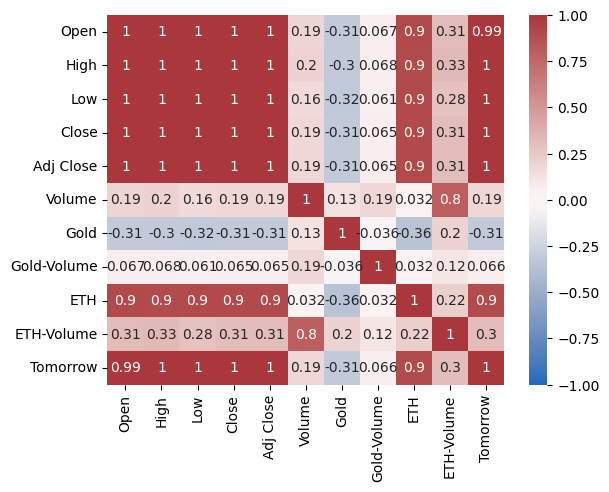

In [15]:
from seaborn import heatmap
import matplotlib.pyplot as plt

heatmap(tomorrow_corr, annot=True, vmin=-1, vmax=1, center=0, cmap='vlag')


### Drop the date column

In [16]:
df = btc.reset_index()
df.drop('Date', axis=1, inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Gold,Gold-Volume,ETH,ETH-Volume,Tomorrow
0,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,NaN,NaN,130.802002,7935230330,6985.470215
1,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,18.49,7096800.0,127.410179,8032709256,7344.884277
2,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,18.57,13759300.0,134.171707,10476845358,7410.656738
3,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,NaN,NaN,135.069366,7430904515,7411.317383
4,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,NaN,NaN,136.276779,7526675353,7769.219238


### drop all the columns with low correlation rate

In [17]:
columns = df.columns

for column in columns:
    column_corr = df['Tomorrow'].corr(df[column])
    if abs(column_corr) < 0.4:
        df.drop(column, axis=1, inplace=True)

df.head()

,Open,High,Low,Close,Adj Close,ETH,Tomorrow
0,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,130.802002,6985.470215
1,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,127.410179,7344.884277
2,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,134.171707,7410.656738
3,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,135.069366,7411.317383
4,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,136.276779,7769.219238


### drop rows with Na values

In [19]:
df.dropna(inplace=True)
df.shape

(1682, 7)

### determain X and Y of our model

In [20]:
x = df.drop('Tomorrow', axis=1)
y = df['Tomorrow']

print(x.shape)
print(y.shape)

(1682, 6)
(1682,)


## Normalization

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

x

array([[-1.43804605, -1.44204267, -1.43371838, -1.43941401, -1.43941401,
        -1.53767908],
       [-1.43761848, -1.44434343, -1.44746534, -1.45139971, -1.45139971,
        -1.5406199 ],
       [-1.44979513, -1.43334786, -1.44862819, -1.43133567, -1.43133567,
        -1.53475743],
       ...,
       [ 1.17435679,  1.27496772,  1.25048531,  1.28671729,  1.28671729,
         0.4807077 ],
       [ 1.28875772,  1.3113522 ,  1.28760863,  1.2305103 ,  1.2305103 ,
         0.37481295],
       [ 1.23234087,  1.58121613,  1.29599527,  1.60356592,  1.60356592,
         0.67546854]])

### Split the train and test data

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1345, 6) (1345,) (337, 6) (337,)


## Train model and save the results for comparison

In [24]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import root_mean_squared_error
import time

result_list= []
models = [LinearRegression(), Lasso(), Ridge()]

for model in models:
    start = time.time()
    model.fit(x_train, y_train)

    all_pred = model.predict(x)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    all_rmse = root_mean_squared_error(y, all_pred)
    train_rmse = root_mean_squared_error(y_train, y_train_pred)
    test_rmse = root_mean_squared_error(y_test, y_test_pred)

    end = time.time()

    result = {
        "model": str(model),
        "all_rmse": all_rmse,
        "train_rmse": train_rmse,
        "test_rmse": test_rmse,
        "time": end - start
    }
    result_list.append(result)


/home/hossein/UNI/MFT/Machine Learning/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.705e+08, tolerance: 3.247e+07
  model = cd_fast.enet_coordinate_descent(


### create the result dataframe

In [25]:
import pandas as pd
result_df = pd.DataFrame(result_list)
result_df

,model,all_rmse,train_rmse,test_rmse,time
0,LinearRegression(),1247.188319,1166.078027,1528.626559,0.006019
1,Lasso(),1253.486123,1181.160360,1507.982283,0.015520
2,Ridge(),1247.483736,1173.423234,1507.247137,0.007625


## Compare models and show on plot

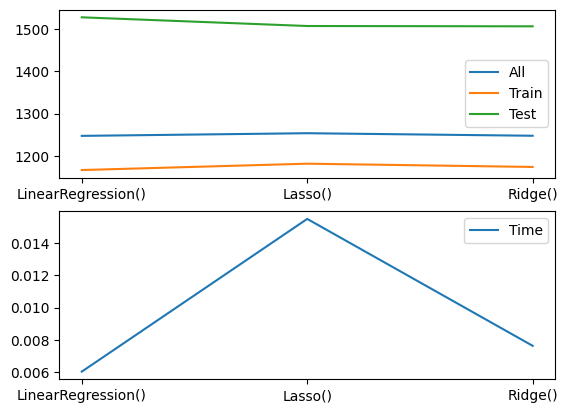

In [26]:
plt.subplot(2,1,1)
plt.plot(result_df["model"], result_df["all_rmse"], label="All")
plt.plot(result_df["model"],result_df["train_rmse"], label="Train")
plt.plot(result_df["model"],result_df["test_rmse"], label="Test")
plt.legend()


plt.subplot(2,1,2)
plt.plot(result_df["model"],result_df["time"], label="Time")

plt.legend()
plt.show()